## Classical ML classifiers and Neural Network to predict medical insurance charges

In [501]:
# Importing libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import seaborn as sns
import pandas as pd

In [502]:
# Loading dataset
df = pd.read_csv('/data/analytics/naveen.bansal/Jeremy/data/insurance.csv'); 

In [503]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [504]:
# Checking summary of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [505]:
#Checking for null values in dataset
df[df["region"].isnull()]

,age,sex,bmi,children,smoker,region,charges


## Encoding categorical variables

In [506]:
pd.get_dummies(df["sex"])
sex=pd.get_dummies(df["sex"],drop_first=True)

In [507]:
df=pd.concat([df,sex],axis=1)

In [508]:
df=df.drop(["sex"],axis=1)

In [509]:
pd.get_dummies(df["smoker"])
smoker=pd.get_dummies(df["smoker"],drop_first=True)
df=pd.concat([df,smoker],axis=1)
df=df.drop(["smoker"],axis=1)

In [510]:
df=df.rename(columns={"yes": "smoker"})

In [511]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [512]:
region=pd.get_dummies(df["region"])

In [513]:
df=pd.concat([df,region],axis=1)
df=df.drop(["region"],axis=1)

## Finding the correlation between charges and other features


In [514]:
df.corr()['charges'].sort_values()

southwest   -0.043210
northwest   -0.039905
northeast    0.006349
male         0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

In [515]:
X=df[["age","bmi","children","male","smoker","northeast","northwest","southeast","southwest"]]
y=df["charges"]

## Train Test Split

In [516]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [517]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Linear Regression

In [518]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [519]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)

In [520]:
metrics.mean_squared_error(y_test, y_pred)

27990510.4552454

In [521]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7945734016952852

Text(0, 0.5, 'y_pred')

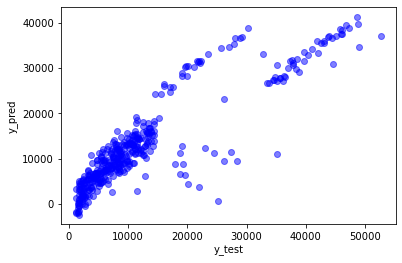

In [522]:
plt.scatter(y_test,y_pred, c="blue", alpha=0.5)
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

## Random Forest 

In [523]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [524]:
Rf = RandomForestRegressor(n_estimators = 100,criterion = 'mse',random_state = 1,n_jobs = -1)
Rf.fit(X_train,y_train)
y_pred = Rf.predict(X_test)
r2_score(y_test,y_pred)

0.8638208203113511

In [525]:
metrics.mean_squared_error(y_test,y_pred)

18555166.586596724

Text(0, 0.5, 'y_pred')

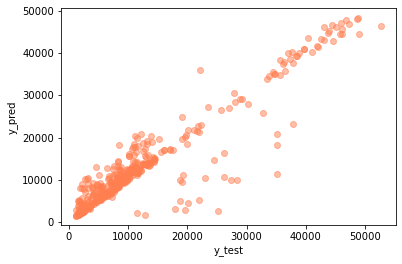

In [526]:
plt.scatter(y_test,y_pred, c="coral", alpha=0.5)
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

R^2 measures the goodness of fit in a model. For this dataset random forest regressor performs better than linear regression

In [527]:
X_train.shape


(936, 9)

In [528]:
y_test.shape

(402,)

## Neural Network

In [529]:
# Scaling all the values to the same range (0-1)
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler((0,1))
sc_y = MinMaxScaler((0,1))

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

y_train = y_train.to_numpy()
y_train = y_train.reshape(-1,1)
y_train= sc_y.fit_transform(y_train)
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1,1)
y_test = sc_y.transform(y_test)

In [530]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.FloatTensor(y_train)
y_test=torch.FloatTensor(y_test)

In [591]:
import pdb
class neural_net2(nn.Module):
    def __init__(self,in_features=9,out_features=1):
        super().__init__()
        self.layer1= nn.Linear(in_features,4)   
        self.layer2=nn.Linear(4,out_features)
        
    def forward(self,x):
        x=F.relu (self.layer1(x))
        y_pred=self.layer2(x)
        
        return y_pred

In [579]:
import torch.nn.functional as F

In [580]:
model = neural_net2()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.0001)

In [586]:
import pdb
li_train_loss=[]
li_test_loss=[]
epochs=10000
count=0
for i in range(epochs):
    
    # Training Phase
    #pdb.set_trace()
    model.train()
    optimizer.zero_grad()
    y_pred = model.forward(X_train)
    train_loss = criterion(y_train,y_pred)
    train_loss.backward()
    optimizer.step()
    li_train_loss.append(train_loss)
    
    # Testing Phase
    model.eval()
    y_pred = model.forward(X_test)
    test_loss = criterion(y_test.reshape(-1,1),y_pred)
    li_test_loss.append(test_loss)
    
    if count%1000==0:
        print (f" Epoch {i}, Train loss: {train_loss.item()}, Test loss: {test_loss.item()}")
    count+=1  

 Epoch 0, Train loss: 0.11419935524463654, Test loss: 0.12287250906229019
 Epoch 1000, Train loss: 0.08043175935745239, Test loss: 0.0857091024518013
 Epoch 2000, Train loss: 0.0631163939833641, Test loss: 0.06607628613710403
 Epoch 3000, Train loss: 0.05392499640583992, Test loss: 0.055276382714509964
 Epoch 4000, Train loss: 0.048797596246004105, Test loss: 0.049042992293834686
 Epoch 5000, Train loss: 0.045719213783741, Test loss: 0.04521062597632408
 Epoch 6000, Train loss: 0.04369267076253891, Test loss: 0.0426708459854126
 Epoch 7000, Train loss: 0.042221955955028534, Test loss: 0.040852390229701996
 Epoch 8000, Train loss: 0.041055597364902496, Test loss: 0.039449695497751236
 Epoch 9000, Train loss: 0.04006662219762802, Test loss: 0.038301121443510056


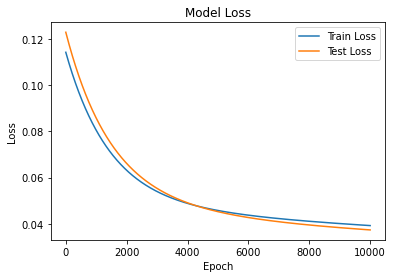

In [587]:
plt.plot(li_train_loss, label="Train Loss")
plt.plot(li_test_loss, label="Test Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [588]:
def features(feature):
    template = ["age","bmi","children","male","smoker","northeast","northwest","southeast","southwest"]
    
    x = []
    x.append(feature['age'])
    x.append(feature['bmi'])
    x.append(feature['children'])
    x.append(1 if feature['sex']=='male' else 0)
    x.append(1 if feature['smoker']=='yes' else 0)
    x.append(1 if feature['region']=='northeast' else 0)
    x.append(1 if feature['region']=='northwest' else 0)
    x.append(1 if feature['region']=='southeast' else 0)
    x.append(1 if feature['region']=='southwest' else 0)
 
    return x

In [589]:
def pred(x):
    x = np.array(x)
    x = x.reshape(1,-1)
    x_lr_rf=pd.DataFrame(x)
    prediction_lr = lreg.predict(x_lr_rf)
    prediction_rf = Rf.predict(x_lr_rf)
    x_nn= sc.transform(x)
    x_nn = torch.FloatTensor(x_nn)
    prediction_nn=model.forward(x_nn)
    prediction_nn=sc_y.inverse_transform(prediction_nn.detach().cpu().numpy())
    
    return prediction_lr,prediction_rf, prediction_nn

In [590]:
feature={"age":37,"sex":'female',"bmi":27.74,"children":3,"smoker":'no', "region":'northhwest'}
x=features(feature)
prediction_lr,prediction_rf,prediction_nn=pred(x)
print (f"Prediction_Linear_Regression: {prediction_lr}, Prediction_Random_Forest_Regressor: {prediction_rf}, Prediction_Neural_Network: {prediction_nn}")


Prediction_Linear_Regression: [8077.34862716], Prediction_Random_Forest_Regressor: [6962.6927999], Prediction_Neural_Network: [[15885.315]]


In this analysis, I have used Linear Regression,Random Forest and ANN model to predict the cost of treatment of the patients. Since it is a small dataset, Random Forest predicts the insurance cost closest to the ground truth in comparison to neural network.
